In [1]:
from biggraph.embedding import Embedding
from biggraph.utils.faiss_utils import kmeans, closest_to


Loading faiss with AVX2 support.


In [2]:

mod = "/data/models/itwiki-2013"
emb = Embedding(mod)
emb.load_XY()
x = emb.get_X()
y = emb.get_Y()
print(x.shape)



Loading data..
Labels not defined
Labels not defined
Labels not defined
Labels not defined
Labels not defined
Labels not defined
Labels not defined
Labels not defined
Labels not defined
Labels not defined
(1016179, 128)


In [3]:
emb.set_entities()
ent = emb.get_entities()
print(ent[:10])



[832640, 66337, 845071, 986056, 165375, 675574, 756174, 348053, 733183, 948490]


In [5]:
emb.set_node_ids("/data/graphs/itwiki-2013/itwiki-2013.ids")

In [8]:
itwiki_kmeans = kmeans(x, 50, niter=100)
clusters = closest_to(itwiki_kmeans.centroids, x)
for pos, cluster in enumerate(clusters):
    print("Cluster {}\n".format(pos + 1))
    for node in emb.get_node_id(cluster):
        print(node)
    print()

Cluster 1

Cedarville
Inwood
Contea di Aroostook
Contea di Portage (Wisconsin)
Cherry Creek
Contea di Yamhill
Long Lake
North Bend
West Branch
Contee del Wisconsin
Mount Washington
White Oak
Contea di Garland
Contea di Vernon (Wisconsin)
Vinton

Cluster 2

Courage League 1991-1992
Courage League 1987-1988
English Premiership 1997-1998
Courage League 1995-1996
Courage League 1994-1995
High Wycombe
Bridgend
Courage League 1993-1994
English Premiership 2000-2001
Federazione di rugby a 15 dell'Irlanda
Llanelli
Portrush
Home Championship 1903
Home Championship 1890
Castleknock

Cluster 3

Il Gallo e l'Arlecchino
Quirino Principe
Renata Borgatti
Henry Barraud
Oedipus rex (Stravinskij)
The Rape of Lucretia
Jean-Yves Daniel-Lesur
Ballets suédois
Suite lirica
Furtwängler
Théâtre de la Ville
Tiziana Lauri
Luigi Rognoni
Pulcinella (balletto)
Giulio Confalonieri (musicista)

Cluster 4

Succinato deidrogenasi (ubichinone)
Metionina
Adenina
Mannitolo
Inibitore enzimatico
Pompa protonica
Imbrunimento

In [10]:
import numpy as np

subset = np.random.choice(len(x), 50, replace=False)
titles = [i for i in emb.get_node_id(subset)]
titles[:10]

['Stazione meteorologica di Bormio',
 'Muessa',
 'Veyreau',
 'Ricerca',
 'Mark Burton',
 'Risoluzione Conflitti',
 'Museo Nelson-Atkins',
 'Sunja',
 '10378 Ingmarbergman',
 'Su Nuraxi']

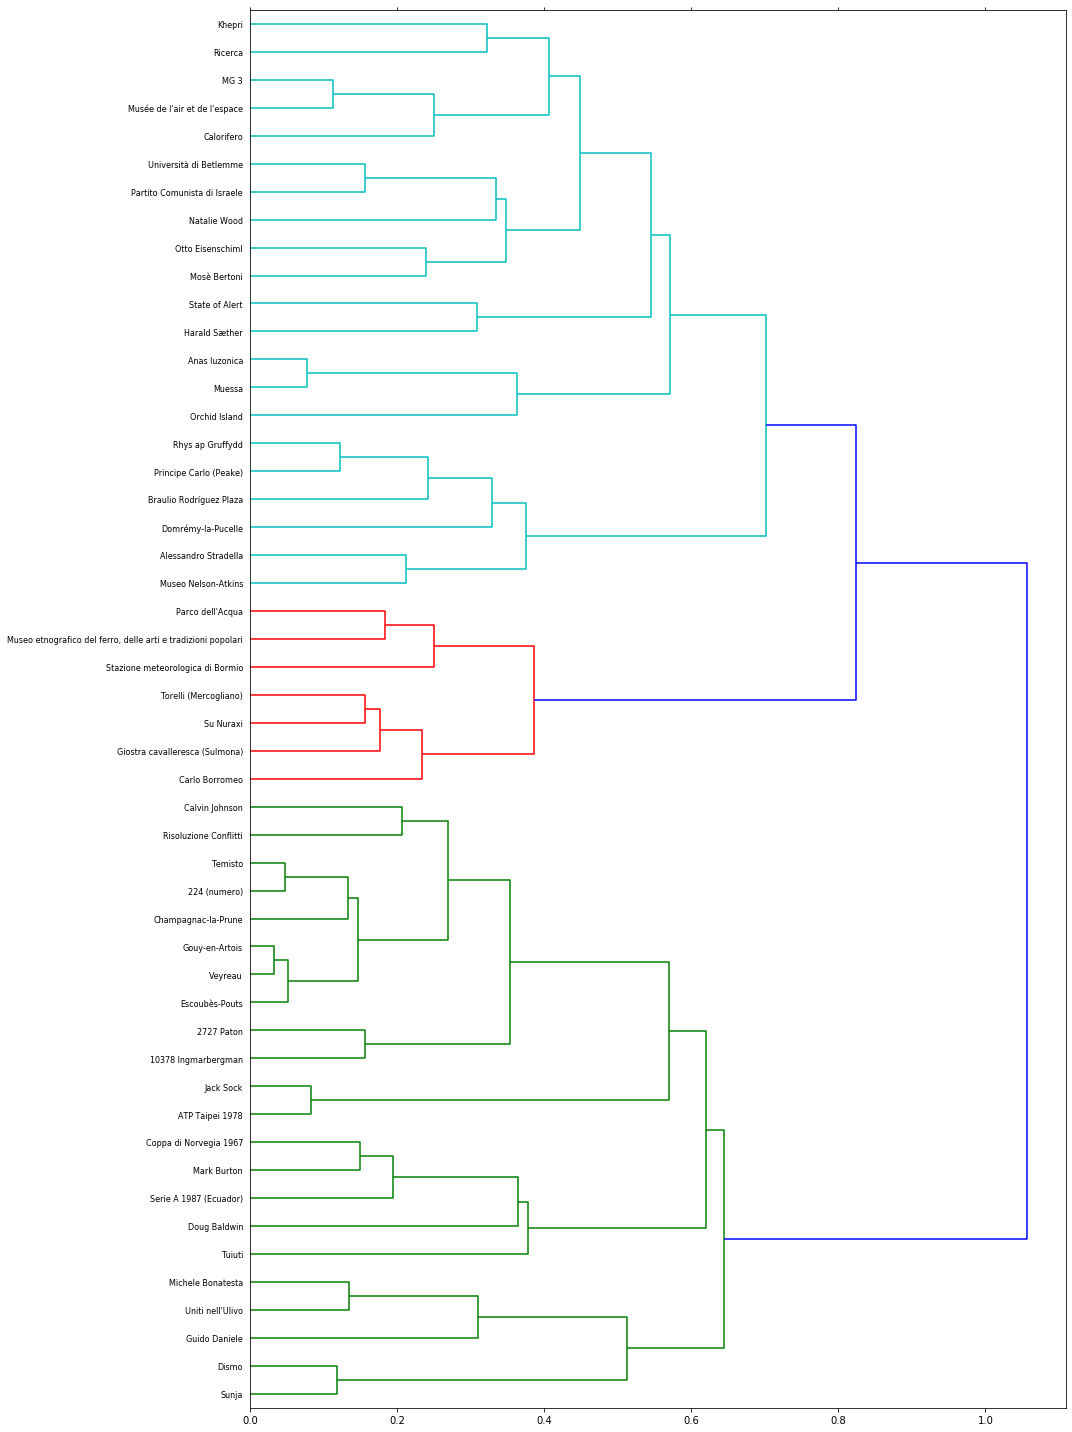

<Figure size 432x288 with 0 Axes>

In [13]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt


dist = pdist(x[subset], 'euclidean')
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout
plt.show()

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters